# ***numpy构建基本函数***

# 1. Jupyter Notebook

① 编写代码后，通过按 "SHIFT" + "ENTER" 或单击笔记本上部栏中的 "Run Cell" 来运行该单元块。

② 例如，运行下面的两个单元格，test赋值为 "Hello World"，输出 "Hello World"。

In [1]:
test = "Hello World"

In [2]:
print ("test: " + test)

test: Hello World


# 2. numpy构建基本函数

① Numpy是Python中主要的科学计算包。它由一个大型社区维护。

② 在本练习中，你将学习一些关键的numpy函数，例如np.exp，np.log和np.reshape。

③ 你需要知道如何使用这些函数去完成将来的练习。

## 2.1 sigmoid function和np.exp()

① 在使用np.exp()之前，你将使用math.exp()实现Sigmoid函数。

② 然后，你将知道为什么np.exp()比math.exp()更可取。

① 练习：构建一个返回实数x的sigmoid的函数。将math.exp(x) 用于指数函数。

② 提示：$sigmoid(x) = \frac{1}{1+e^{-x}}$ 有时也称为逻辑函数。它是一种非线性函数，即可用于机器学习（逻辑回归），也能用于深度学习。

③ 要引用特定程序包的函数，可以使用package_name.function() 对其进行调用。运行下面的代码查看带有math.exp() 的示例。

In [3]:
import math

def basic_sigmoid(x):
    """
    Compute sigmoid of x.

    Arguments:
    x -- A scalar

    Return:
    s -- sigmoid(x)
    """
    
    s = 1/(1 + math.exp(-x))
    
    return s

In [4]:
basic_sigmoid(3)

0.9525741268224334

④ 因为函数的输入是实数，所以我们很少在深度学习中使用“math”库。 而深度学习中主要使用的是矩阵和向量，因此numpy更为实用。

In [5]:
### One reason why we use "numpy" instead of "math" in Deep Learning ###
x = [1, 2, 3]
basic_sigmoid(x) # you will see this give an error when you run it, because x is a vector.       

TypeError: bad operand type for unary -: 'list'

⑤ 如果$x = (x_1, x_2, ..., x_n)$是行向量，则$np.exp(x)$会将指数函数应用于x的每个元素。 因此，输出为：$np.exp(x) = (e^{x_1}, e^{x_2}, ..., e^{x_n})$

In [6]:
import numpy as np

# example of np.exp
x = np.array([1, 2, 3])
print(np.exp(x)) # result is (exp(1), exp(2), exp(3))

[ 2.71828183  7.3890561  20.08553692]


⑥ 如果$x$是向量，则$s = x + 3$或$s = \frac{1}{x}$之类的Python运算将输出与x维度大小相同的向量s。

In [7]:
# example of vector operation
x = np.array([1, 2, 3])
print (x + 3)

[4 5 6]


① 练习：使用numpy实现sigmoid函数。

② 说明：x可以是实数，向量或矩阵。 我们在numpy中使用的表示向量、矩阵等的数据结构称为numpy数组。现阶段你只需了解这些就已足够。

$\text{For } x \in \mathbb{R}^n \text{,     } sigmoid(x) = sigmoid\begin{pmatrix}  
    x_1  \\  
    x_2  \\  
    ...  \\  
    x_n  \\  
\end{pmatrix} = \begin{pmatrix}  
    \frac{1}{1+e^{-x_1}}  \\  
    \frac{1}{1+e^{-x_2}}  \\  
    ...  \\  
    \frac{1}{1+e^{-x_n}}  \\  
\end{pmatrix}\tag{1}$

In [8]:
# GRADED FUNCTION: sigmoid

import numpy as np # this means you can access numpy functions by writing np.function() instead of numpy.function()

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size

    Return:
    s -- sigmoid(x)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-x))
    ### END CODE HERE ###
    
    return s

In [9]:
x = np.array([1, 2, 3])
sigmoid(x)

array([0.73105858, 0.88079708, 0.95257413])

## 2.2 Sigmoid gradient

① 正如你在教程中所看到的，我们需要计算梯度来使用反向传播优化损失函数。让我们开始编写第一个梯度函数吧。

② 练习：创建函数sigmoid_grad() 计算sigmoid函数相对于其输入x的梯度。 公式为：

$sigmoid\_derivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))\tag{2}$

③ 我们通常分两步编写此函数代码：
 1. 将s设为x的sigmoid。 你可能会发现sigmoid（x）函数很方便。
 2. 计算$\sigma'(x) = s(1-s)$

In [10]:
# GRADED FUNCTION: sigmoid_derivative

def sigmoid_derivative(x):
    """
    Compute the gradient (also called the slope or derivative) of the sigmoid function with respect to its input x.
    You can store the output of the sigmoid function into variables and then use it to calculate the gradient.
    
    Arguments:
    x -- A scalar or numpy array

    Return:
    ds -- Your computed gradient.
    """
    
    s = sigmoid(x)
    ds = s * (1 - s)
    
    return ds

In [11]:
x = np.array([1, 2, 3])
print ("sigmoid_derivative(x) = " + str(sigmoid_derivative(x)))

sigmoid_derivative(x) = [0.19661193 0.10499359 0.04517666]


## 2.3 重塑数组

① 深度学习中两个常用的numpy函数是np.shape和np.reshape()。
 - X.shape用于获取矩阵/向量X的shape(维度)。
 - X.reshape(...) 用于将X重塑为其他尺寸。

② 例如，在计算机科学中，图像由shape为$(length, height, depth = 3)$的3D数组表示。但是，当你读取图像作为算法的输入时，会将其转换为维度为$(length*height*3, 1)$的向量。换句话说，将3D阵列“展开”或重塑为1D向量。

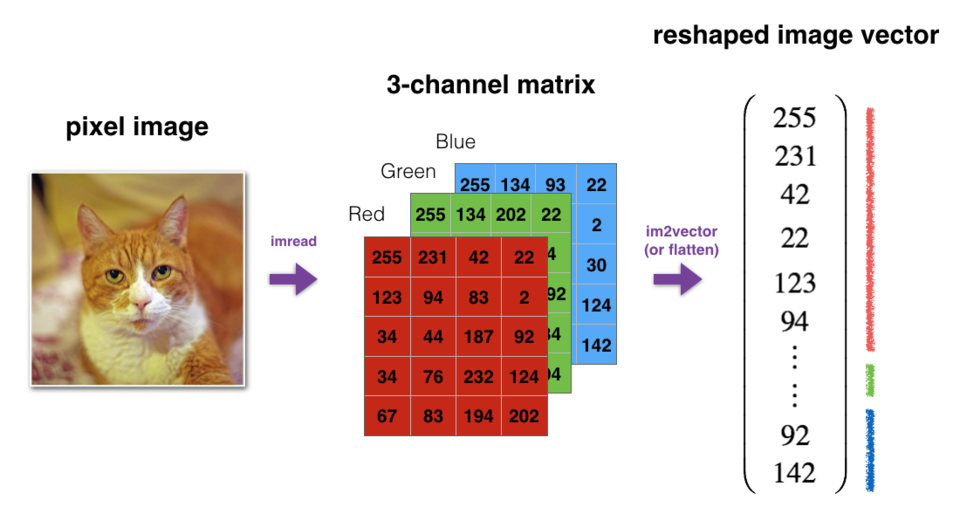

③ 练习：实现image2vector()，该输入采用维度为(length, height, 3)的输入，并返回维度为(length * height * 3, 1)的向量。

④ 例如，如果你想将形为（a，b，c）的数组v重塑为维度为(a * b, c)的向量，则可以执行以下操作：

In [ ]:
v = v.reshape((v.shape[0]*v.shape[1], v.shape[2])) # v.shape[0] = a ; v.shape[1] = b ; v.shape[2] = c        

⑤ 请不要将图像的尺寸硬编码为常数。而是通过image.shape[0]等来查找所需的数量。

In [12]:
# GRADED FUNCTION: image2vector
def image2vector(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)
    
    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """
    
    v = image.reshape(image.shape[0] * image.shape[1] * image.shape[2], 1)      
    
    return v

In [13]:
# This is a 3 by 3 by 2 array, typically images will be (num_px_x, num_px_y,3) where 3 represents the RGB values
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

print(image.shape)
print ("image2vector(image) = " + str(image2vector(image)))

(3, 3, 2)
image2vector(image) = [[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


## 2.4 行标准化

① 我们在机器学习和深度学习中使用的另一种常见技术是对数据进行标准化。

② 由于归一化后梯度下降的收敛速度更快，通常会表现出更好的效果。

③ 通过归一化，也就是将x更改为$\frac{x}{\| x\|}$（将x的每个行向量除以其范数）。

例如：$x =   
\begin{bmatrix}  
    0 & 3 & 4 \\  
    2 & 6 & 4 \\  
\end{bmatrix}\tag{3}$

then $\| x\| = np.linalg.norm(x, axis = 1, keepdims = True) = \begin{bmatrix}  
    5 \\  
    \sqrt{56} \\  
\end{bmatrix}\tag{4}$

and $x\_normalized = \frac{x}{\| x\|} = \begin{bmatrix}  
    0 & \frac{3}{5} & \frac{4}{5} \\  
    \frac{2}{\sqrt{56}} & \frac{6}{\sqrt{56}} & \frac{4}{\sqrt{56}} \\  
\end{bmatrix}\tag{5}$

④ 请注意，你可以划分不同大小的矩阵，以获得更好的效果：这称为broadcasting，我们将在第5部分中学习它。

⑤ 练习：执行 normalizeRows（）来标准化矩阵的行。 将此函数应用于输入矩阵x之后，x的每一行应为单位长度（即长度为1）向量。

In [14]:
# GRADED FUNCTION: normalizeRows

def normalizeRows(x):
    """
    Implement a function that normalizes each row of the matrix x (to have unit length).
    
    Argument:
    x -- A numpy matrix of shape (n, m)
    
    Returns:
    x -- The normalized (by row) numpy matrix. You are allowed to modify x.
    """
    
    # Compute x_norm as the norm 2 of x. Use np.linalg.norm(..., ord = 2, axis = ..., keepdims = True)
    x_norm = np.linalg.norm(x, axis = 1, keepdims = True)
    
    print(x_norm.shape)
    print(x.shape)
    
    # Divide x by its norm.
    x = x / x_norm

    return x

In [15]:
x = np.array([
    [0, 3, 4],
    [1, 6, 4]])
print("normalizeRows(x) = " + str(normalizeRows(x)))

(2, 1)
(2, 3)
normalizeRows(x) = [[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]


⑥ 注意：在normalizeRows() 中，你可以尝试print查看 x_norm 和 x 的维度，然后重新运行练习cell。

⑦ 你会发现它们具有不同的w维度。 鉴于x_norm采用x的每一行的范数，这是正常的。

⑧ 因此，x_norm具有相同的行数，但只有1列。 那么，当你将x除以x_norm时，它是如何工作的？ 这就是所谓的广播broadcasting，我们现在将讨论它！

## 2.5 广播和softmax函数

① 在numpy中要理解的一个非常重要的概念是“广播”。

② 这对于在不同形状的数组之间执行数学运算非常有用。有关广播的完整详细信息，你可以阅读官方的broadcasting documentation.

③ 练习: 使用numpy实现softmax函数。

④ 你可以将softmax理解为算法需要对两个或多个类进行分类时使用的标准化函数。你将在本专业的第二门课中了解有关softmax的更多信息。

操作指南: $\text{for } x \in \mathbb{R}^{1\times n} \text{,     } softmax(x) = softmax(\begin{bmatrix}  
    x_1  &&  
    x_2 &&  
    ...  &&  
    x_n    
\end{bmatrix}) = \begin{bmatrix}  
     \frac{e^{x_1}}{\sum_{j}e^{x_j}}  &&  
    \frac{e^{x_2}}{\sum_{j}e^{x_j}}  &&  
    ...  &&  
    \frac{e^{x_n}}{\sum_{j}e^{x_j}}   
\end{bmatrix}$

$softmax(x) = softmax\begin{bmatrix}  
x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\  
x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\  
\vdots & \vdots & \vdots & \ddots & \vdots \\  
x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn}  
\end{bmatrix} = \begin{bmatrix}  
\frac{e^{x_{11}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{12}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{13}}}{\sum_{j}e^{x_{1j}}} & \dots  & \frac{e^{x_{1n}}}{\sum_{j}e^{x_{1j}}} \\  
\frac{e^{x_{21}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{22}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{23}}}{\sum_{j}e^{x_{2j}}} & \dots  & \frac{e^{x_{2n}}}{\sum_{j}e^{x_{2j}}} \\  
\vdots & \vdots & \vdots & \ddots & \vdots \\  
\frac{e^{x_{m1}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m2}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m3}}}{\sum_{j}e^{x_{mj}}} & \dots  & \frac{e^{x_{mn}}}{\sum_{j}e^{x_{mj}}}  
\end{bmatrix} = \begin{pmatrix}  
softmax\text{(first row of x)}  \\  
softmax\text{(second row of x)} \\  
...  \\  
softmax\text{(last row of x)} \\  
\end{pmatrix}$

In [16]:
# GRADED FUNCTION: softmax

def softmax(x):
    """Calculates the softmax for each row of the input x.

    Your code should work for a row vector and also for matrices of shape (n, m).

    Argument:
    x -- A numpy matrix of shape (n,m)

    Returns:
    s -- A numpy matrix equal to the softmax of x, of shape (n,m)
    """
    
    # Apply exp() element-wise to x. Use np.exp(...).
    x_exp = np.exp(x)

    # Create a vector x_sum that sums each row of x_exp. Use np.sum(..., axis = 1, keepdims = True).
    x_sum = np.sum(x_exp, axis = 1, keepdims = True)
    
    print(x_exp.shape)
    print(x_sum.shape)
    
    # Compute softmax(x) by dividing x_exp by x_sum. It should automatically use numpy broadcasting.
    s = x_exp / x_sum
    
    return s

In [17]:
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])
print("softmax(x) = " + str(softmax(x)))

(2, 5)
(2, 1)
softmax(x) = [[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


⑤ 注意：如果你在上方输出 x_exp，x_sum 和 s 的维度并重新运行练习单元，则会看到x_sum的纬度为(2,1)，而x_exp和s的维度为(2,5)。x_exp/x_sum 可以使用python广播。

⑥ 恭喜你！ 你现在已经对python numpy有了很好的理解，并实现了一些将在深度学习中用到的功能。

## 2.6 向量化

① 在深度学习中，通常需要处理非常大的数据集。

② 因此，非计算最佳函数可能会成为算法中的巨大瓶颈，并可能使模型运行一段时间。

③ 为了确保代码的高效计算，我们将使用向量化。例如，尝试区分点/外部/元素乘积之间的区别。

In [18]:
import time

x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]

### CLASSIC DOT PRODUCT OF VECTORS IMPLEMENTATION ###
tic = time.process_time()
dot = 0
for i in range(len(x1)):
    dot+= x1[i]*x2[i] # 用for循环的 向量点积 元素相乘再相加 
toc = time.process_time()
print ("dot = " + str(dot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### CLASSIC OUTER PRODUCT IMPLEMENTATION ###
tic = time.process_time()
outer = np.zeros((len(x1),len(x2))) # we create a len(x1)*len(x2) matrix with only zeros
for i in range(len(x1)):
    for j in range(len(x2)):
        outer[i,j] = x1[i]*x2[j] # 用for循环的 x2 扩增为矩阵，x2向量的倍数扩增
toc = time.process_time()
print ("outer = " + str(outer) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### CLASSIC ELEMENTWISE IMPLEMENTATION ###
tic = time.process_time()
mul = np.zeros(len(x1))
for i in range(len(x1)):
    mul[i] = x1[i]*x2[i]  # 用for循环的 x2 不扩增为矩阵，仅x2向量的倍数扩增
toc = time.process_time()
print ("elementwise multiplication = " + str(mul) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### CLASSIC GENERAL DOT PRODUCT IMPLEMENTATION ###
W = np.random.rand(3,len(x1)) # Random 3*len(x1) numpy array
tic = time.process_time()
gdot = np.zeros(W.shape[0])
for i in range(W.shape[0]):
    for j in range(len(x1)):
        gdot[i] += W[i,j]*x1[j] # 用for循环的 矩阵 W 与 x2 向量进行线性代数相乘
toc = time.process_time()
print ("gdot = " + str(gdot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

dot = 278
 ----- Computation time = 0.0ms
outer = [[81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [63. 14. 14. 63.  0. 63. 14. 35.  0.  0. 63. 14. 35.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
 ---

In [19]:
x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]

### VECTORIZED DOT PRODUCT OF VECTORS ###
tic = time.process_time()
dot = np.dot(x1,x2) # 向量化后
toc = time.process_time()
print ("dot = " + str(dot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### VECTORIZED OUTER PRODUCT ###
tic = time.process_time()
outer = np.outer(x1,x2)
toc = time.process_time()
print ("outer = " + str(outer) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### VECTORIZED ELEMENTWISE MULTIPLICATION ###
tic = time.process_time()
mul = np.multiply(x1,x2)
toc = time.process_time()
print ("elementwise multiplication = " + str(mul) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### VECTORIZED GENERAL DOT PRODUCT ###
tic = time.process_time()
dot = np.dot(W,x1)
toc = time.process_time()
print ("gdot = " + str(dot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

dot = 278
 ----- Computation time = 0.0ms
outer = [[81 18 18 81  0 81 18 45  0  0 81 18 45  0  0]
 [18  4  4 18  0 18  4 10  0  0 18  4 10  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [63 14 14 63  0 63 14 35  0  0 63 14 35  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [81 18 18 81  0 81 18 45  0  0 81 18 45  0  0]
 [18  4  4 18  0 18  4 10  0  0 18  4 10  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
 ----- Computation time = 0.0ms
elementwise multiplication = [81  4 10  0  0 63 10  0  0  0 81  4 25  0  0]
 ----- Computation time = 0.0ms
gdot = [22.67372425 24.22852519 24.53999511]
 ----- Computation time = 0.0ms


④ 你可能注意到了，向量化的实现更加简洁高效。对于更大的向量/矩阵，运行时间的差异变得更大。

⑤ 注意：不同于 np.multiply() 和 * 操作符 ( 相当于Matlab / Octave中的 .* ) 执行逐元素的乘法，np.dot()执行的是矩阵-矩阵或矩阵向量乘法。

## 2.7 实现L1和L2损失函数

① 练习：实现L1损失函数的Numpy向量化版本。我们会发现函数abs(x) (x的绝对值) 很有用。

② 提示：
 - 损失函数用于评估模型的性能。损失越大，预测($\hat{y}$) 与真实值($y$)的差异也就越大。在深度学习中，我们使用诸如Gradient Descent之类的优化算法来训练模型并最大程度地降低成本。
 - L1损失函数定义为：$\begin{align*} & L_1(\hat{y}, y) = \sum_{i=0}^m|y^{(i)} - \hat{y}^{(i)}| \end{align*}\tag{6}$

In [20]:
# GRADED FUNCTION: L1

def L1(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)
    
    Returns:
    loss -- the value of the L1 loss function defined above
    """
    
    loss = np.sum(np.abs(y - yhat))
    
    return loss

In [21]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L1 = " + str(L1(yhat,y)))

L1 = 1.1


③ 练习：实现L2损失函数的Numpy向量化版本。

④ 有好几种方法可以实现L2损失函数，但是还是np.dot() 函数更好用。提醒一下，如果$x = [x_1, x_2, ..., x_n]$，则np.dot（x，x）=$\sum_{j=0}^n x_j^{2}$。

⑤ L2损失函数定义为： $\begin{align*} & L_2(\hat{y},y) = \sum_{i=0}^m(y^{(i)} - \hat{y}^{(i)})^2 \end{align*}\tag{7}$

In [22]:
# GRADED FUNCTION: L2

def L2(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)
    
    Returns:
    loss -- the value of the L2 loss function defined above
    """
    
    loss = np.dot((y - yhat),(y - yhat).T)
    
    return loss

In [23]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L2 = " + str(L2(yhat,y)))

L2 = 0.43


⑥ 祝贺你完成此教程练习。 我们希望这个小小的热身运动可以帮助你以后的工作，那将更加令人兴奋和有趣！